In [2]:
%matplotlib inline
from model import *
from agents import *
from globals import *
# from server import *
from schedule import *
from utility import *
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner, BatchRunnerMP
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output
import multiprocessing as mp

In [3]:
from mesa.batchrunner import BatchRunner, BatchRunnerMP

fixed_params = {"N": 1000,
                "network_type": 2,
                "no_of_neighbors": 3,
                "beta_component": 0.15,
                "social_influence": 0.06,
                "swingers": 3,
#                 "malicious_N":0,
                "echo_limit":0.95,
                "all_majority": False,
                "similarity_treshold": 0.16,
#                 "malicious_N": 0,
                 
               }
variable_params = {"opinions":  list(range(2, 6)),
                "malicious_N":list(range(0, 6)),
                  }

batch_run = BatchRunnerMP(Network,
                        iterations=30,
                        max_steps=100,
                        fixed_parameters=fixed_params,
                        variable_parameters=variable_params,
#                         model_reporters=model_reporters, 
                        nr_processes=8,
                        model_reporters={                
                            "radical_opinions": compute_radical_opinions,
                            "community_no": community_no,
#                             "echo_chambers": echo_no,
                            "majority_opinion": compute_majority_opinions,
                            "silent_spiral": compute_silent_spiral,
                            "compute_transitivity":compute_transitivity,
                            "compute_echo_chamber":compute_echo_chamber,
                            "echochamber_size":echochamber_size,
                            "echochamber_count":echochamber_count
                        })
batch_run.run_all()
data = batch_run.get_model_vars_dataframe()

#print data
print(data)

720it [1:25:23,  4.75s/it]


     opinions  malicious_N  Run  community_no  compute_echo_chamber  \
0           2            0    0             9                    95   
1           2            0    1            13                   111   
2           2            0    2            15                    71   
3           2            0    3            12                    89   
4           2            0    4            11                    76   
5           2            0    5            12                    60   
6           2            0    6            12                   126   
7           2            0    7            12                    91   
8           2            0    8            11                    88   
9           2            0    9            13                    77   
10          2            0   10            13                    80   
11          2            0   11            12                    69   
12          2            0   12            13                    74   
13    

[720 rows x 20 columns]


In [4]:
data.to_pickle('./Data/MaliciousVSOpinions.pkl')

In [84]:
data = pd.read_pickle('./Data/MaliciousVSOpinions.pkl')
model_reporters={                
    "radical_opinions": compute_radical_opinions,
    "community_no": community_no,
#                             "echo_chambers": echo_no,
    "majority_opinion": compute_majority_opinions,
    "silent_spiral": compute_silent_spiral,
    "compute_transitivity":compute_transitivity,
    "compute_echo_chamber":compute_echo_chamber,
    "echochamber_size":echochamber_size,
    "echochamber_count":echochamber_count
}
del model_reporters['echochamber_size']
reporters = model_reporters.keys()
reporters

dict_keys(['radical_opinions', 'community_no', 'majority_opinion', 'silent_spiral', 'compute_transitivity', 'compute_echo_chamber', 'echochamber_count'])

[2 3 4 5]
[0 1 2 3 4 5]
(4, 6)


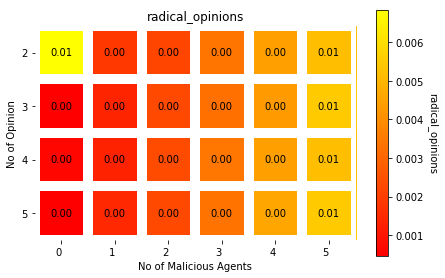

(4, 6)


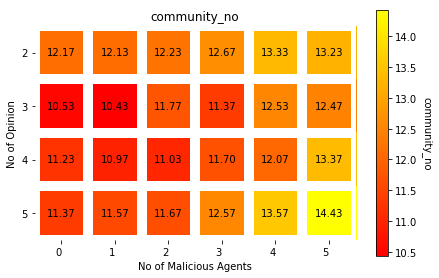

(4, 6)


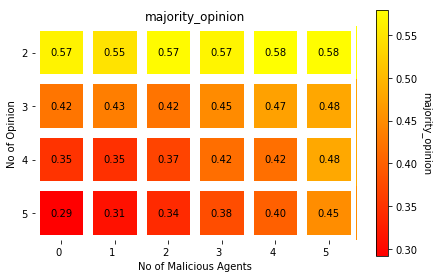

(4, 6)


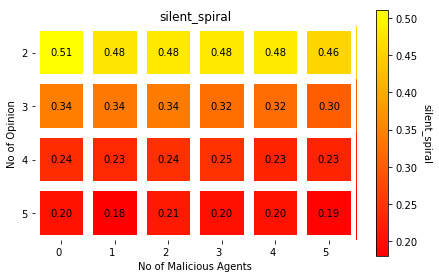

(4, 6)


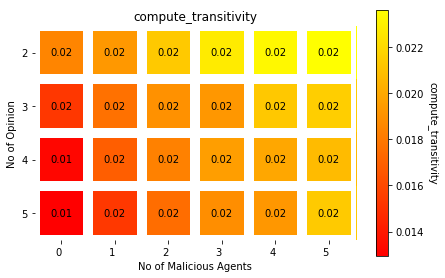

(4, 6)


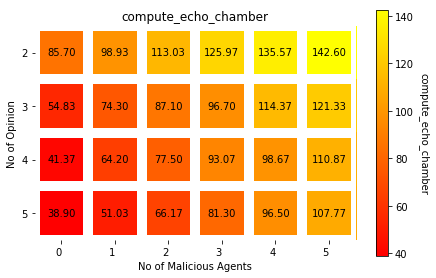

(4, 6)


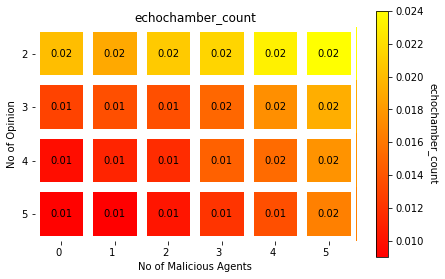

In [119]:
from matplotlib import ticker, cm

opinions = data.opinions.unique()
malicious_agents = data.malicious_N.unique()
print(opinions)
print(malicious_agents)

for reporter in reporters:
    data_dict = []
#     data_dict[reporter] = {}
    for i,opinion in enumerate(opinions):
#         print(i)
        data_dict.append([])

#         means = []
#         stds = []
#         mal_As = []
        for j, mal_A in enumerate(malicious_agents):
#             print(i,j)
            d = data.loc[(data['opinions'] == opinion) & (data['malicious_N'] == mal_A)]
            data_dict[i].append(d[reporter].mean())
#             means.append(d[reporter].mean())
#             stds.append(d[reporter].std())
#             mal_As.append(mal_A)
            
#         entry = {'opinion':opinion,'mal_A':mal_As, 'reporter': reporter, 'mean':means, 'std':stds}
        
    #         data_dict[reporter][opinion] = entry
    opinions = variable_params['opinions']
    malicious_N = variable_params['malicious_N']


    data_dict = np.array(data_dict)
    print(data_dict.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(data_dict,cmap=plt.get_cmap('autumn'))

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(malicious_N)))
    ax.set_yticks(np.arange(len(opinions)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(malicious_N)
    ax.set_yticklabels(opinions)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(opinions)):
        for j in range(len(malicious_N)):
    #         print(i,j)
    #         print(data[i][j])
            text = ax.text(j, i, '{:.2f}'.format(data_dict[i][j]), ha="center", va="center", color="k")

    # ax.set_title("Harvest of local farmers (in tons/year)")
    fig.tight_layout()
    plt.title(reporter)
    plt.xlabel('No of Malicious Agents')
    plt.ylabel('No of Opinion')
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax,cmap=cm.PuBu_r)
    cbarlabel = reporter
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    for edge, spine in ax.spines.items():
        spine.set_visible(False)    
    ax.set_xticks(np.arange(data_dict.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data_dict.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=10)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    plt.show()

            

        
        
        
        



In [104]:
type(data_dict)

list